Importing Libraries

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Loading Main Dataset

In [104]:
df = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Syntecxhub-Internship-Programme\Flower Classification\datasets\1) iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [105]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [106]:
df.shape

(150, 5)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [108]:
df.duplicated().sum()

np.int64(3)

In [109]:
df.drop_duplicates(inplace=True)

In [110]:
df.duplicated().sum()

np.int64(0)

In [111]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [113]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Exploratory Data Analysis

Numerical Variable Distribution 

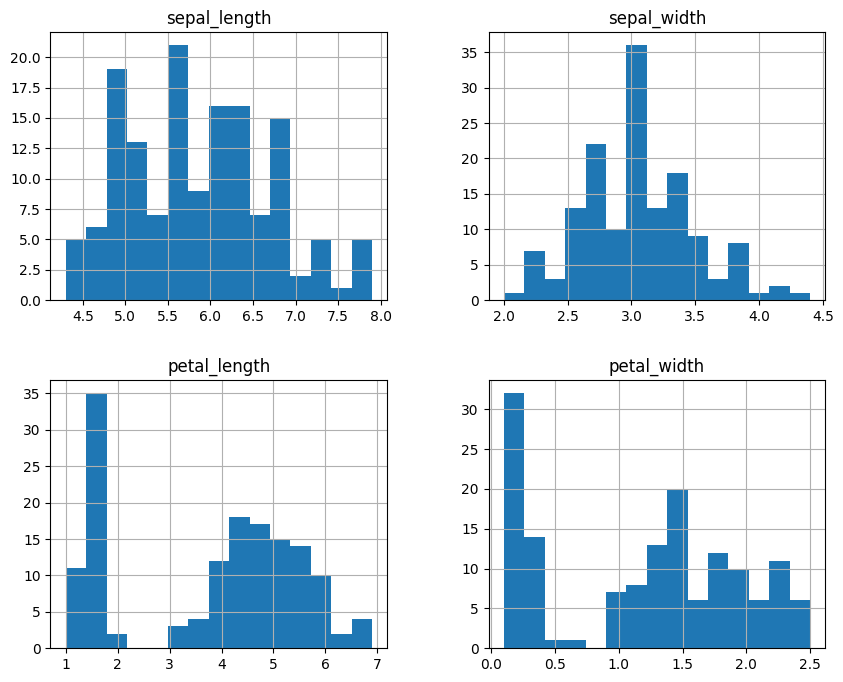

In [114]:
df_num = df._get_numeric_data()
df_num.hist(bins=15, figsize=(10,8))
plt.show()

Target Variable Distribution

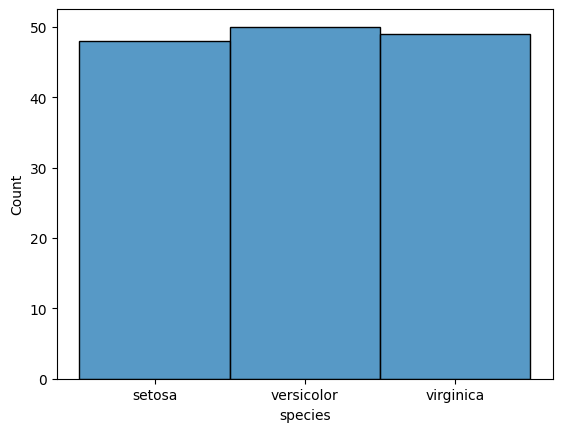

In [115]:
sns.histplot(df['species'], bins=30)
plt.show()

Feature Pair Visualization

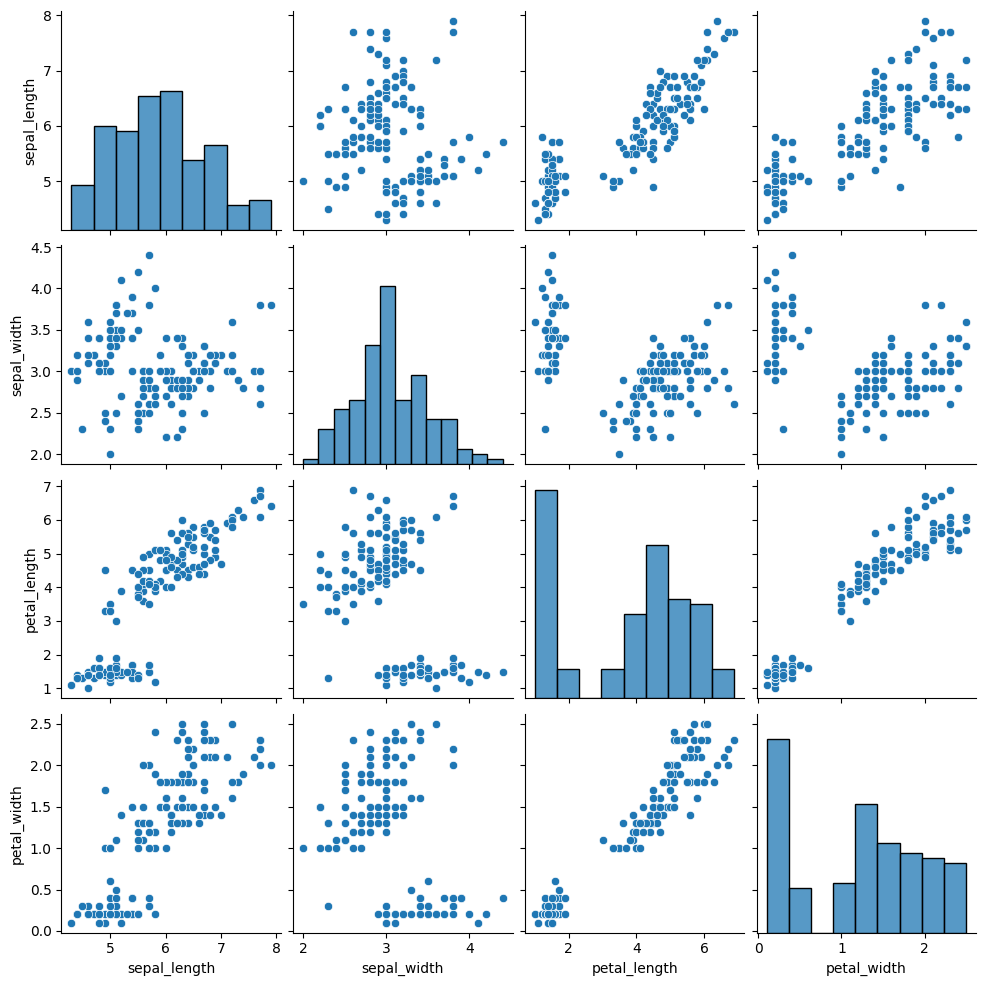

In [116]:
columns_to_plot = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

sns.pairplot(df[columns_to_plot])
plt.show()

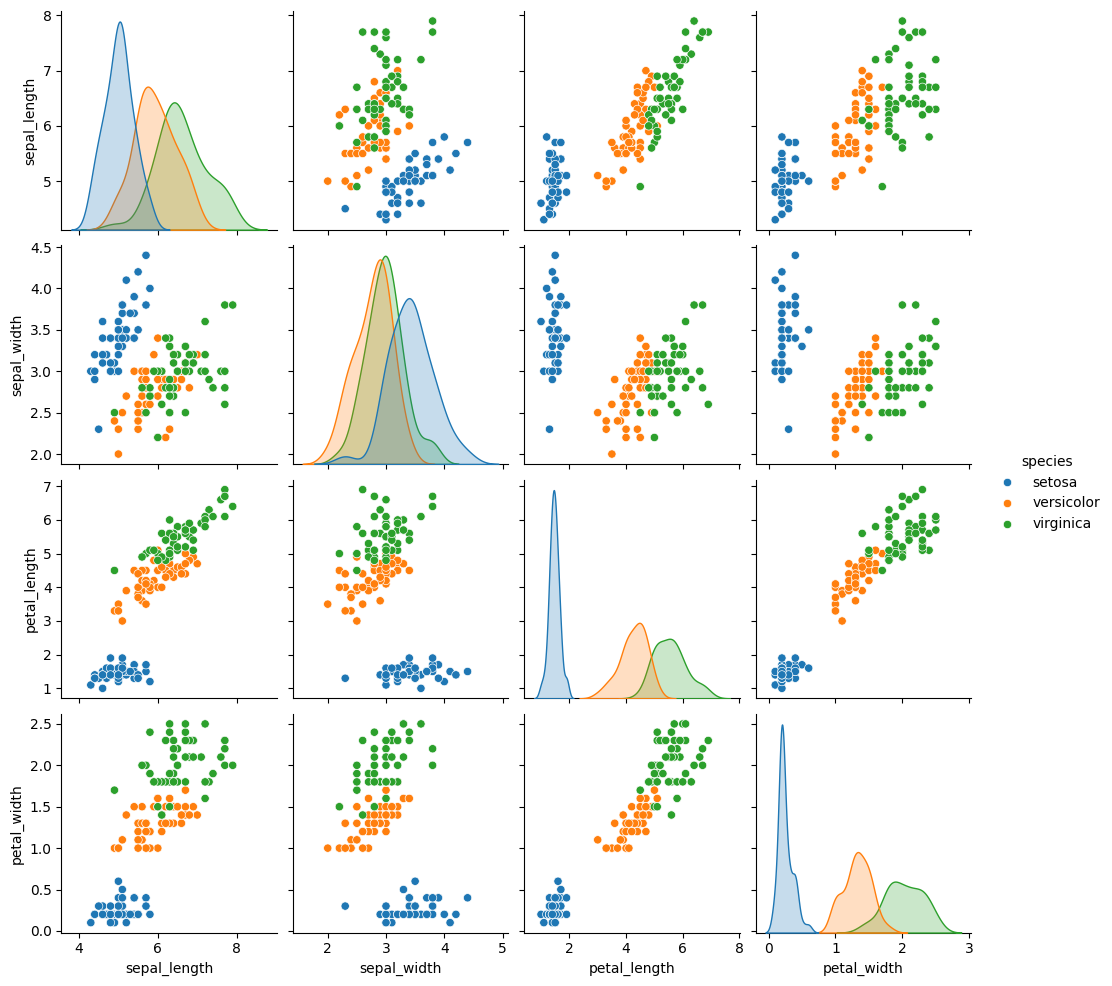

In [117]:
sns.pairplot(data=df, hue='species')
plt.show()

Data Splitting

In [118]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [119]:
train.shape

(117, 5)

In [120]:
test.shape

(30, 5)

In [121]:
train.to_csv('flower classification train set.csv', index=False)
test.to_csv('flower classification test set.csv', index=False)